# Module 27.2: Ultimate Data Science Challenge

Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

## Part 1 - Exploratory data analysis

In [1]:
#Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
login_data = "logins.json"
login_df = pd.read_json(login_data)

print(login_df.info())
login_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#Checking for duplicate values
print(login_df.duplicated().value_counts())
print(login_df.shape)

False    92265
True       877
dtype: int64
(93142, 1)


In [4]:
#Removing duplicate values from dataframe
login_df = login_df[login_df.duplicated(keep='first') == False]
print(login_df.duplicated().value_counts())
print(login_df.shape)

False    92265
dtype: int64
(92265, 1)


In [5]:
#Objective: Aggregate these login counts based on 15minute time intervals
login_df['val_count'] = 1
grouped_logins = login_df.groupby(pd.Grouper(key="login_time", freq="15Min")).sum().reset_index()
grouped_logins['month'] = grouped_logins['login_time'].dt.strftime('%b')
grouped_logins['hour'] = grouped_logins['login_time'].dt.hour
grouped_logins['day_of_week'] = grouped_logins['login_time'].dt.strftime('%a')
grouped_logins['is_weekend'] = np.where(((grouped_logins["day_of_week"]=='Sat') | (grouped_logins["day_of_week"]=='Sat')),1,0)
grouped_logins

,login_time,val_count,month,hour,day_of_week,is_weekend
0,1970-01-01 20:00:00,2,Jan,20,Thu,0
1,1970-01-01 20:15:00,6,Jan,20,Thu,0
2,1970-01-01 20:30:00,9,Jan,20,Thu,0
3,1970-01-01 20:45:00,7,Jan,20,Thu,0
4,1970-01-01 21:00:00,1,Jan,21,Thu,0
...,...,...,...,...,...,...
9783,1970-04-13 17:45:00,5,Apr,17,Mon,0
9784,1970-04-13 18:00:00,5,Apr,18,Mon,0
9785,1970-04-13 18:15:00,2,Apr,18,Mon,0
9786,1970-04-13 18:30:00,7,Apr,18,Mon,0


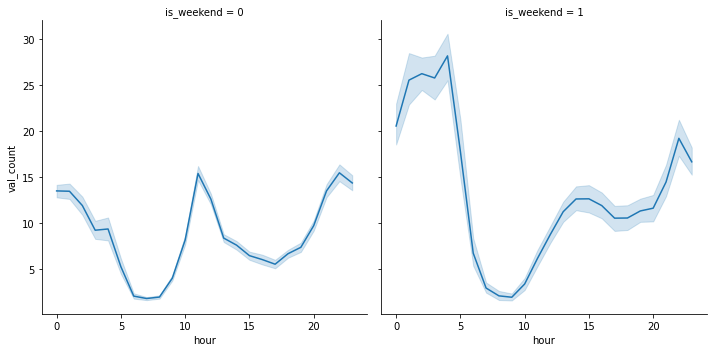

In [6]:
#Objective: Visualize & describe resulting time series of login counts
#in ways that best characterize the underlying patterns of demand
sns.relplot(data=grouped_logins, x="hour", y="val_count", kind='line', col = 'is_weekend', col_wrap=2)
plt.show()

#### Please report/illustrate important features of demand, such as daily cycles
<br>

Demand differs between weekdays & weekends.
Weekday demand peaks around 15 logins per hour at 11PM and 11AM. The weekday low occurs around 7AM with 2 logins.
<br>
Weekend demand peaks around 25-30 logins between 12AM (Midnight) and 5AM. The weekend low occurs around 9AM with 2 logins.
<br>
#### If there are data quality issues, please report them
There were 877 duplicate values, which were removed before analysis was conducted.

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? <br>
<br>The primary metric I would use is toll volume. This metric could be aggregated by driver to see if drivers are travleing between cities more often as a result of the reimbursed toll costs.<br> <br>
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. <br> <br>
I would design an experiment to quantify the number of tolls taken. The data source could be from the toll plaza or from the driver partners app.
The key assumptions would be that: <br>the toll booth applies the toll by license plate & the toll is identified (Gotham -> Metropolis or Metropolis -> Gotham).<br>
Statistical Test(s): We would determine the baseline distribution characteristics and the distbibution characteristics after implementing the change. Our test value would set a P-Value (measure of significance to) of .05 and determine whether the change is statistically significant between the two distributions.
If we find that the distribution of tolls has changed by a statistically significant amount, we would conclude that this change meaningfully impacted the number of tolls taken.<br>


## Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

### Data description

city: city this user signed up in
<br>phone: primary device for this user
<br>signup_date: date of account registration; in the form ‘YYYYMMDD’
<br>last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
<br>avg_dist: the average distance in miles per trip taken in the first 30 days after signup
<br>avg_rating_by_driver: the rider’s average rating over all of their trips
<br>avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
<br>surge_pct: the percent of trips taken with surge multiplier > 1
<br>avg_surge: The average surge multiplier over all of this user’s trips
<br>trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
<br>ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
<br>weekday_pct: the percent of the user’s trips occurring during a weekday

#### 3.1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [7]:
data = "ultimate_data_challenge.json"
df = pd.read_json(data)

In [8]:
df.info()
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Da

In [9]:
import datetime
date_of_report_pull = datetime.datetime(2014, 7, 17)

In [10]:
#Feature modeling for modeling step
df['active'] = np.where((date_of_report_pull - df['last_trip_date']).dt.days <= 30, 1, 0)
#df['active'] = np.where((df['last_trip_date'] - df['signup_date']).dt.days >= 180, 1, 0)

In [11]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [12]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.00000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.25658
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.43675
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.00000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.00000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.00000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.00000


In [13]:
#Checking for and dropping duplicate values
df.duplicated().value_counts()
df = df[df.duplicated(keep='first') == False]

In [14]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [15]:
#What fraction of the observed users were retained?
#not_retained = df[df['trips_in_first_30_days'] == 0]
not_retained = df[(date_of_report_pull - df['last_trip_date']).dt.days > 30]
percent_retained = 1 - (not_retained.shape[0] / df.shape[0])
print("The fraction of retained users is " + 
      str(df.shape[0] - not_retained.shape[0]) + " / " + str(df.shape[0]) + " users.")
print("The percentage of retained users is " + str(round(percent_retained, 4)*100) + "%")

The fraction of retained users is 12829 / 49992 users.
The percentage of retained users is 25.66%


#### 3.2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In the following cells, we model retention resulting in 82.44% accuracy on unseen data.
Multiple models were chosen and current active status was evaluated as the target.

The most relevant feature, was the recency since the last trip. However, this feature does not provide much predictive power so it was excluded from the analysis.


In [16]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (47492, 13)
Unseen Data For Predictions: (2500, 13)


In [17]:
from pycaret.classification import *

exp_clf101 = setup(data = df, target = 'active', session_id=123, ignore_features = ['last_trip_date']) 


,Description,Value
0,session_id,123
1,Target,active
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(49992, 13)"
5,Missing Values,True
6,Numeric Features,7
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7992,0.8326,0.4796,0.6532,0.5530,0.4274,0.4360,0.1360
gbc,Gradient Boosting Classifier,0.7979,0.8302,0.4547,0.6592,0.5380,0.4142,0.4260,0.6920
ada,Ada Boost Classifier,0.7943,0.8226,0.4448,0.6501,0.5280,0.4024,0.4143,0.2010
rf,Random Forest Classifier,0.7810,0.8016,0.4645,0.5996,0.5233,0.3842,0.3896,0.6190
et,Extra Trees Classifier,0.7653,0.7830,0.4615,0.5562,0.5044,0.3524,0.3551,0.8610
knn,K Neighbors Classifier,0.7628,0.7507,0.4291,0.5545,0.4837,0.3330,0.3377,0.2250
lr,Logistic Regression,0.7616,0.7399,0.2251,0.6071,0.3284,0.2190,0.2590,0.9410
lda,Linear Discriminant Analysis,0.7610,0.7405,0.2324,0.5990,0.3348,0.2223,0.2594,0.0670
ridge,Ridge Classifier,0.7582,0.0000,0.1788,0.6133,0.2769,0.1811,0.2311,0.0490
dummy,Dummy Classifier,0.7411,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0210


In [19]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [20]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8017,0.8359,0.4492,0.6761,0.5398,0.4199,0.4341
1,0.8011,0.8356,0.4658,0.6656,0.5481,0.4256,0.4368
2,0.7963,0.8252,0.4426,0.6585,0.5294,0.4057,0.4187
3,0.8026,0.8334,0.4647,0.6715,0.5492,0.4282,0.4401
4,0.8071,0.8447,0.4868,0.6774,0.5665,0.4467,0.4568
5,0.7848,0.8132,0.4360,0.6201,0.5120,0.3793,0.3890
6,0.7957,0.8285,0.4448,0.6553,0.5299,0.4054,0.4178
7,0.7862,0.8170,0.4426,0.6227,0.5174,0.3851,0.3944
8,0.7988,0.8325,0.4669,0.6568,0.5458,0.4213,0.4314


In [21]:
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [22]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7940,0.8228,0.4525,0.6457,0.5321,0.4052,0.4158
1,0.7911,0.8256,0.4735,0.6281,0.5400,0.4083,0.4151
2,0.7934,0.8183,0.4735,0.6356,0.5427,0.4129,0.4204
3,0.7931,0.8255,0.4558,0.6413,0.5329,0.4049,0.4146
4,0.8059,0.8385,0.4901,0.6717,0.5667,0.4456,0.4548
5,0.7791,0.8065,0.4536,0.5965,0.5154,0.3757,0.3816
6,0.7885,0.8168,0.4636,0.6231,0.5316,0.3988,0.4061
7,0.7845,0.8044,0.4503,0.6145,0.5197,0.3851,0.3928
8,0.7968,0.8235,0.4934,0.6395,0.5570,0.4280,0.4341


In [23]:
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.4, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=190,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [24]:
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

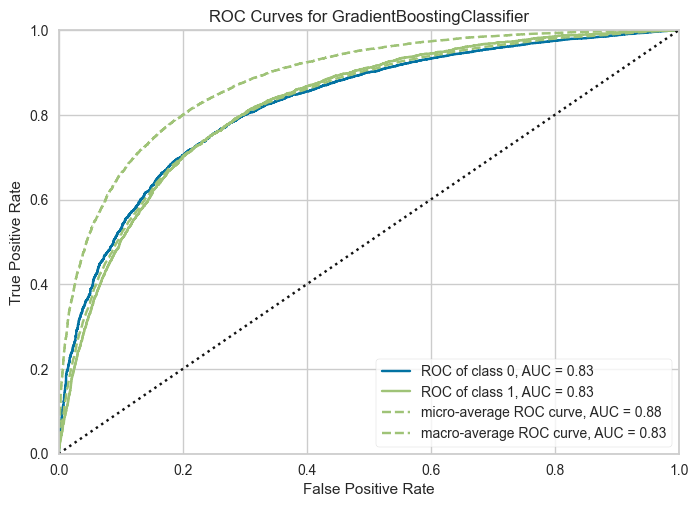

In [25]:
plot_model(tuned_gbc, plot = 'auc')

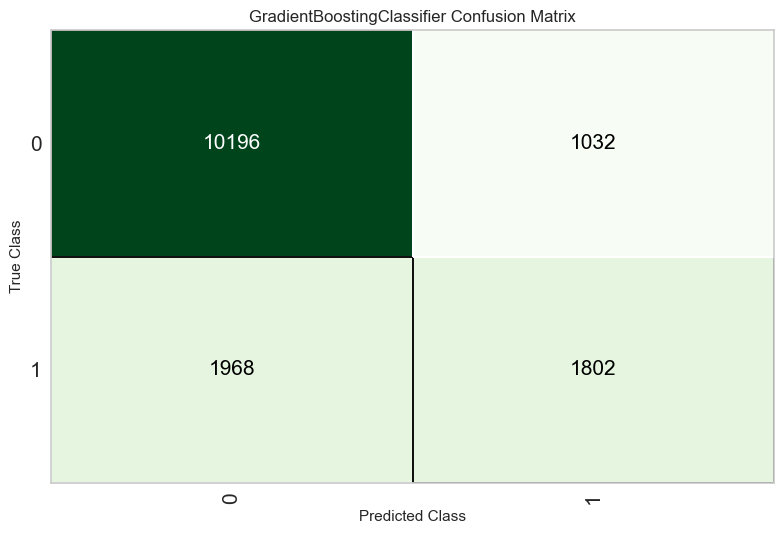

In [26]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

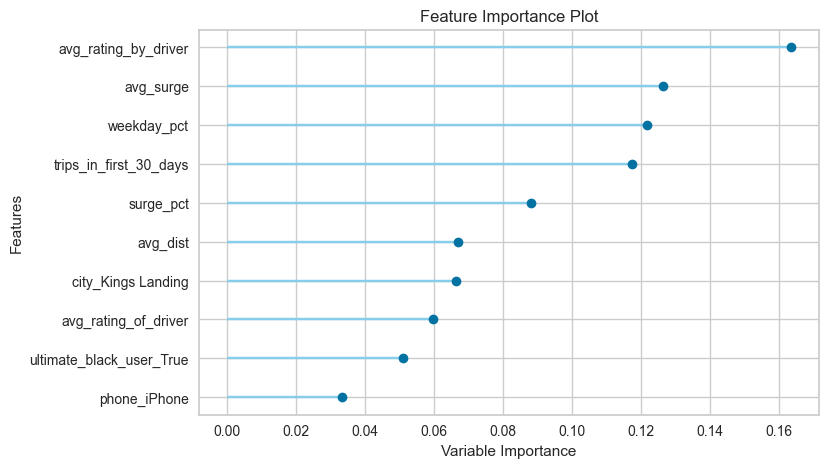

In [27]:
plot_model(tuned_gbc, plot = 'feature')

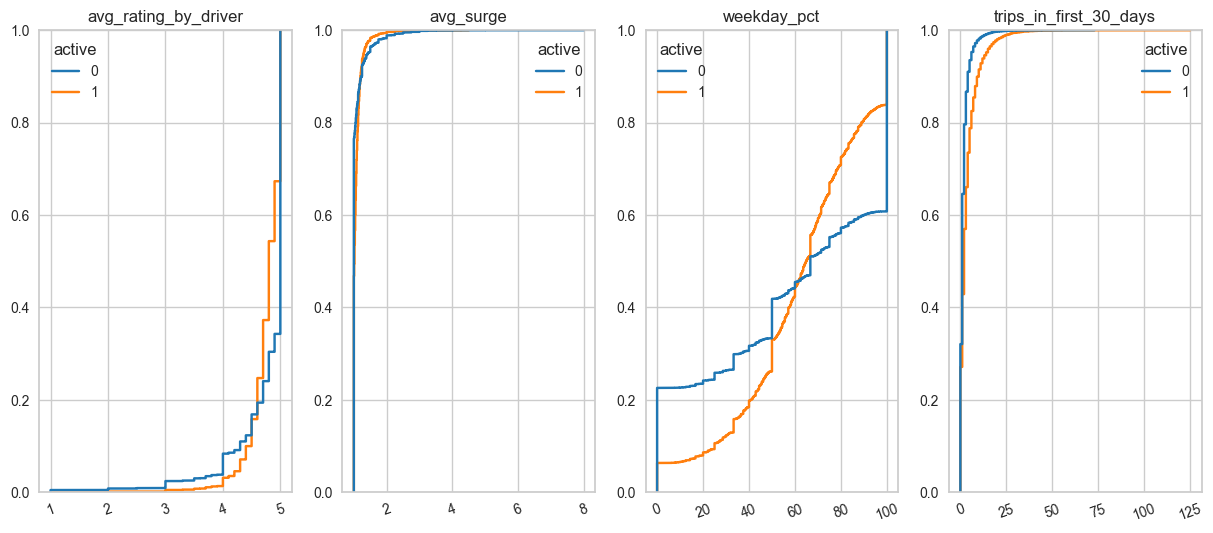

In [28]:
top3features = ['avg_rating_by_driver', 'avg_surge', 'weekday_pct', 'trips_in_first_30_days']
# sns.displot(data=df, kind='ecdf', x="surge_pct", hue='active') \
#     .set(title='Cumulative Distribution of Surge Percentage Driving')

i = 1
fig, ax = plt.subplots(2, 2, figsize=(15, 6))
for n in top3features:
    plt.subplot(1, 4, i)
    ax = sns.ecdfplot(x = df[n], hue = df['active'], palette = 'tab10')
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

In [29]:
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8000,0.8251,0.4780,0.6359,0.5457,0.4208,0.4278


In [30]:
final_gbc = finalize_model(tuned_gbc)

In [31]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8244,0.8722,0.5477,0.7401,0.6295,0.5178,0.5279


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,Label,Score
0,Winterfell,2,2014-01-09,3.5,1.0,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,0,0,0.9272
1,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0,0,0,0.9655
2,Winterfell,4,2014-01-02,4.5,1.0,2014-05-02,Android,0.0,False,52.4,3.24,5.0,0,0,0.8762
3,Astapor,0,2014-01-31,4.3,1.0,2014-03-10,Android,0.0,False,66.7,10.21,5.0,0,0,0.9558
4,Astapor,1,2014-01-31,NaN,1.0,2014-02-02,iPhone,0.0,False,0.0,4.66,5.0,0,0,0.9555


In [32]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['active'], unseen_predictions['Label'], metric = 'Accuracy')

0.8244

#### 3.3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

The most important features, excluding the last trip date, are: 
* avg_rating_by_driver
* avg_surge
* weekday_pct
* trips_in_fist_30_days

Active users exhibit:
* higher average ratings
* lower avg_surge
* more weekday driving
* more trips in their first 30 days

Ultimate may be able to advertise to attract individuals that meet these criteria by providing bonuses for higher ratings, and trips in the first 30 days.

A/B testing could be done on new driver's during the first 30 days using these categories to boost retention.